# Grid based classification

In deze notebook zullen we gebruik maken van grid based classification. Het idee van grid based classification is om de binaire versie van een afbeelding te verdelen in stukken (rooster over de afbeelding). Per stuk zullen we het aantal witte pixels optellen. Deze data wordt dan gebruikt om de afbeelding te classificeren. Dit zou in een grid van 4x4 betekenen dat we 16 features hebben per afbeelding. hieronder een voorbeeld:

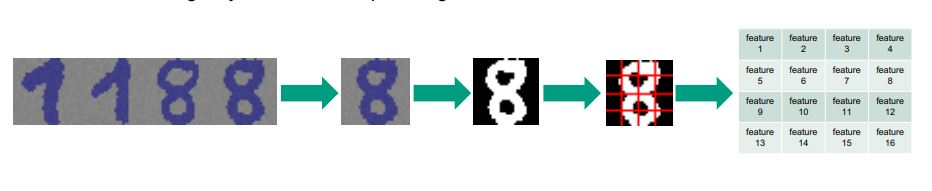

# Uitvoering

Om dit probleem op te pakken zullen we de workflow hanteren die voornamelijk worden gebruikt binnen een Machine learning probleem (Data Science lifecycle). De workflow is te verdelen in de volgende stappen:

1. Data verzamelen
2. Data analyseren
3. Preprocessen
4. Feature engineering
5. Trainen / Testen / Evalueren

Allereerst beginnen we met het importeren van de libraries die we nodig zullen hebben in onze code.

In [2]:
import cv2
import os
import numpy as np
import skimage
from skimage import io, transform, color, filters, data, morphology, measure
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

def load_images_from_folder(folder):
    images = []
    images_name = []
    for filename in os.listdir(folder):
        img = io.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
            images_name.append(filename[0:4])
    
    images_df = pd.DataFrame({"name": images_name,
                             "image": images})
    return images_df

def display(np_image):
    """
    This is a display function that we have added to show numpy images at full size
    If you pass in an image with 3 channels, it will be displayed in RGB
    If you passn in an image with 1 channel, it will be displayed in grayscale
    """
    dpi = matplotlib.rcParams['figure.dpi']
    if len(np_image.shape) == 3:
        height, width, depth = np_image.shape
    else:
        height, width = np_image.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')
    
    # Display the image in either RGB or grayscale (depending on the amount of dimensions)
    if (len(np_image.shape) >= 3):
        ax.imshow(np_image)
    else:
        ax.imshow(np_image, cmap='gray')

    plt.show()

De hierboven gedefineerde functies zijn geleverd door Saxion zelf. Die zullen gebruikt worden voor het inladen van de data en het tonen van de afbeeldingen.

Hieronden wordt de data ingeladen. Voor de zekerheid zullen we de data ook printen.

In [5]:
all_images_df = load_images_from_folder('../dataset-images/dataset1')
all_images_df

,name,image
0,1000,"[[[241, 241, 241], [242, 242, 242], [244, 244,..."
1,1027,"[[[206, 206, 206], [211, 211, 211], [218, 218,..."
2,1029,"[[[82, 82, 82], [83, 83, 83], [84, 84, 84], [8..."
3,1036,"[[[241, 241, 241], [246, 246, 246], [243, 243,..."
4,1053,"[[[241, 241, 241], [243, 243, 243], [243, 243,..."
...,...,...
235,5264,"[[[228, 228, 228], [227, 227, 227], [224, 224,..."
236,5339,"[[[70, 70, 70], [71, 71, 71], [67, 67, 67], [7..."
237,5377,"[[[243, 243, 243], [236, 236, 236], [243, 243,..."
238,5382,"[[[214, 214, 214], [222, 222, 222], [206, 206,..."


Zoals hierboven is te zien is de data succesvol geladen. Laten we voor de zekerheid kijken of er toch geen gebreken zijn. Hiervoor zullen we de "describe()" functie gebruiken.

In [6]:
all_images_df.describe()

,name,image
count,240,240
unique,240,240
top,1266,"[[[222, 222, 222], [240, 240, 240], [238, 238,..."
freq,1,1


Voor nu lijkt de data in orde dus kunnen we verder gaan.

De data is nu verzameld.

Om de data te kunnen gebruiken voor de machine learning algoritme zullen we het eerst moeten preprocessen en de features eruit halen.

Hieronder zullen we een begin maken met het schrijven van de eerste versie van de preproces pipeline. Hiervoor zullen we de volgende stappen uitvoeren:

1. De kleuren van de afbeelding omdraaien, zodat de cijfers wit zijn en de achtergrond zwart.
2. De afbeelding omzetten naar een binair formaat (zwart/wit).
3. Afbeelding knippen naar 1 cijfer per afbeelding.
4. Afbeelding plaatsen in een grid en features eruit halen.

# De kleuren van de afbeelding omdraaien, zodat de cijfers wit zijn en de achtergrond zwart.

In [10]:
import matplotlib
import matplotlib.pyplot as plt


image = all_images_df.iloc[0,1]
image_name = all_images_df.iloc[0,0]

image = image*-1

# De afbeelding omzetten naar een binair formaat (zwart/wit).

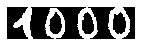

In [11]:
gray = color.rgb2gray(image)
thresh = filters.threshold_otsu(gray)
binary = gray > thresh
display(binary)

# Afbeelding knippen naar 1 cijfer per afbeelding.

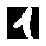

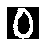

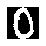

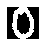

In [13]:
binary_splitted = [binary[:, :32], binary[:, 32:64], binary[:, 64:96], binary[:, 96:128]]

for x in range(0, len(binary_splitted)):
    display(binary_splitted[x])

# Afbeelding plaatsen in een grid en features eruit halen.

In [15]:
df = pd.DataFrame()
for x in range(0, len(binary_splitted)):
    
    
    test = binary_splitted[x]
    height = 8
    width = 8

    s_width = 0
    s_heigth = 0
    #df_tmp = pd.DataFrame({"number": [image_name[x]]})
    df.loc[x, 'number'] = image_name[x]
    for i in range(1, 17):
        h = s_heigth+height
        w = s_width+width
        feat = test[s_heigth:h, s_width:w]
        white_pixels = feat[feat==1]
        total_white_pixels = len(white_pixels)
        df.loc[x, i] = total_white_pixels
        if (i%4 == 0):
            s_width = 0
            s_heigth = s_heigth + height
        else:
            s_width = s_width + width
        #plt.subplot(4,4,i)
        #plt.imshow(feat)
        #display(feat)
    #pd.concat([df, df_tmp])
    #print(binary1)


df

,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,0.0,45.0,7.0,0.0,29.0,62.0,0.0,7.0,30.0,56.0,0.0,0.0,0.0,42.0,5.0
1,0,0.0,39.0,27.0,0.0,3.0,33.0,20.0,9.0,13.0,23.0,12.0,16.0,3.0,41.0,41.0,4.0
2,0,1.0,40.0,32.0,0.0,8.0,33.0,21.0,8.0,9.0,25.0,9.0,17.0,0.0,43.0,41.0,8.0
3,0,5.0,52.0,41.0,0.0,16.0,20.0,18.0,18.0,20.0,18.0,11.0,23.0,2.0,44.0,43.0,7.0


Deze stappen leveren uiteindelijk de features op die hierboven te zien zijn. Voor deze functie is er gebruik gemaakt van een 4x4 grid. Hierdoor hebben we 16 features tot onze beschikking. Dit kan natuurlijk ook in een andere formaat. Dit zal geanalyseerd moeten worden.

Nu het gelukt is om een functie te schrijven die de features uit een afbeelding kan halen door middel van een grid, zullen we dit gebruiken in een grotere formaat. Het idee is om nu een preprocess functie te schrijven die per afbeelding de bovengenoemde stoppen repeteert. 

In [47]:
df = None
error_counts = 0

def initialize_image(image, image_name):
    zipcode = image
    zipcode = zipcode *-1
    gray = color.rgb2gray(zipcode)
    thresh = filters.threshold_otsu(gray)
    binary = gray > thresh
    binary_splitted = [binary[:, :32], binary[:, 32:64], binary[:, 64:96], binary[:, 96:128]]
    
    df = pd.DataFrame()
    for x in range(0, len(binary_splitted)):
        
        test = binary_splitted[x]
        height = 8
        width = 8

        s_width = 0
        s_heigth = 0
        #print('lol: ', image_name[x])
        df.loc[x, 'number'] = image_name[x]

        for i in range(1, 17):
            h = s_heigth+height
            w = s_width+width
            feat = test[s_heigth:h, s_width:w]
            white_pixels = feat[feat==1]
            total_white_pixels = len(white_pixels)
            df.loc[x, i] = total_white_pixels
            if (i%4 == 0):
                s_width = 0
                s_heigth = s_heigth + height
            else:
                s_width = s_width + width
            #plt.subplot(4,4,i)
            #plt.imshow(feat)
            #display(feat)

        #pd.concat([df, df_tmp])
        
    return df
    #display(binary)

Dit betekent dat we nog niet klaar zijn. We moeten er namelijk voor zorgen dat de data goed leesbaar is voor het algoritme. De data is al in een nummer formaat, dus het is al geschikt voor het algoritme. Alleen zijn er nog wel wat verschillen in groottes tussen de data. We willen dus eigenlijk de data gaan normaliseren zodat de algoritme hiermee beter om kan gaan. Hiervoor zullen we twee bekende functies gebruiken:

- MinMaxScaler
- StandarScaler

In [48]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scalerA = StandardScaler()
scalerB = MinMaxScaler()
result = pd.DataFrame()
for i in range(0, len(all_images_df.index)):
    image_name = all_images_df.iloc[i,0]
    image = all_images_df.iloc[i,1]
    tmp_result = initialize_image(image, image_name)
    result = pd.concat([result, tmp_result])
    
result.reset_index(inplace=True)
result.drop(columns=['index'], inplace=True)
result

,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1,0.0,0.0,45.0,7.0,0.0,29.0,62.0,0.0,7.0,30.0,56.0,0.0,0.0,0.0,42.0,5.0
1,0,0.0,39.0,27.0,0.0,3.0,33.0,20.0,9.0,13.0,23.0,12.0,16.0,3.0,41.0,41.0,4.0
2,0,1.0,40.0,32.0,0.0,8.0,33.0,21.0,8.0,9.0,25.0,9.0,17.0,0.0,43.0,41.0,8.0
3,0,5.0,52.0,41.0,0.0,16.0,20.0,18.0,18.0,20.0,18.0,11.0,23.0,2.0,44.0,43.0,7.0
4,1,0.0,48.0,0.0,0.0,19.0,58.0,3.0,0.0,0.0,28.0,13.0,0.0,0.0,52.0,59.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2,11.0,57.0,30.0,3.0,7.0,12.0,42.0,2.0,1.0,29.0,21.0,3.0,8.0,63.0,50.0,20.0
956,5,10.0,59.0,50.0,9.0,9.0,44.0,13.0,12.0,9.0,14.0,37.0,6.0,9.0,49.0,40.0,8.0
957,3,17.0,47.0,41.0,13.0,10.0,28.0,40.0,9.0,9.0,15.0,47.0,24.0,12.0,39.0,44.0,12.0
958,8,13.0,42.0,31.0,11.0,18.0,46.0,49.0,17.0,17.0,54.0,45.0,21.0,7.0,49.0,46.0,16.0


Hierboven is te zien dat het eruit halen van de features is gelukt. Dit heeft ons uiteindelijk 960 datapunten opgeleverd. Laten we verder met een "describe" functie gaan bekijken of er gebreken zijn.

In [49]:
result.describe(include='all')

,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,960,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.00000,960.000000,960.000000,960.000000
unique,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.973958,40.127083,36.930208,5.900000,7.388542,36.345833,34.962500,6.810417,6.153125,31.022917,37.850000,8.566667,3.96250,36.465625,40.151042,9.015625
std,NaN,4.829561,13.274848,13.717176,7.709561,6.242416,15.306639,15.980392,7.340483,6.426977,17.706549,13.952564,7.077681,4.21906,13.516717,13.723210,9.561216
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,NaN,1.000000,35.000000,29.000000,0.000000,2.000000,25.000000,24.000000,1.000000,1.000000,15.750000,29.000000,3.000000,0.00000,30.750000,35.000000,2.000000
50%,NaN,4.000000,43.000000,39.000000,3.000000,6.000000,39.000000,38.000000,5.000000,4.000000,32.000000,39.000000,7.000000,3.00000,38.000000,43.000000,6.000000
75%,NaN,8.000000,50.000000,47.000000,8.000000,12.000000,48.000000,47.000000,10.000000,9.000000,46.000000,48.000000,13.000000,6.00000,45.250000,49.000000,13.000000


Het lijkt erop dat er geen missende velden zijn. Alleen wordt de "number" kolom, ook wel de output kolom gezien als een NaN. We zullen de waardes in deze kolom moeten omzetten naar werkelijke nummers.

In [50]:
result["number"] = pd.to_numeric(result["number"])
result.describe()

,number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.000000,960.00000,960.000000,960.000000,960.000000
mean,3.942708,4.973958,40.127083,36.930208,5.900000,7.388542,36.345833,34.962500,6.810417,6.153125,31.022917,37.850000,8.566667,3.96250,36.465625,40.151042,9.015625
std,2.741914,4.829561,13.274848,13.717176,7.709561,6.242416,15.306639,15.980392,7.340483,6.426977,17.706549,13.952564,7.077681,4.21906,13.516717,13.723210,9.561216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,35.000000,29.000000,0.000000,2.000000,25.000000,24.000000,1.000000,1.000000,15.750000,29.000000,3.000000,0.00000,30.750000,35.000000,2.000000
50%,4.000000,4.000000,43.000000,39.000000,3.000000,6.000000,39.000000,38.000000,5.000000,4.000000,32.000000,39.000000,7.000000,3.00000,38.000000,43.000000,6.000000
75%,6.000000,8.000000,50.000000,47.000000,8.000000,12.000000,48.000000,47.000000,10.000000,9.000000,46.000000,48.000000,13.000000,6.00000,45.250000,49.000000,13.000000
max,9.000000,23.000000,62.000000,64.000000,54.000000,31.000000,64.000000,64.000000,37.000000,39.000000,64.000000,64.000000,35.000000,28.00000,64.000000,64.000000,50.000000


We hebben de kolom omgezet naar nummerieke waardes. Nu kunnen we de data dus ook goed analyseren. Er lijkt binnen de "number" kolom ook geen problemen te zijn. De kleinste waarde is een 0 en de grootste waarde is een 9. Dit klopt inderdaad ook aangezien een postcode de nummer 10 niet kan bevatten. Daarnaast kunnen we met de eerste describe functie herleiden, dat de dataset alle nummers tussen de 0-9 bevat, omdat er 10 unieke waardes zijn geconstateerd.

Dit betekent dat we door kunnen gaan met de volgende stappen.

Allereerst zullen we nu meerdere functies defineren om code duplicatie te voorkomen, dit voorkomt namelijk problemen.

In [51]:
features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

def preprocess(X_train, X_test):
    print('-----Start preprocc----------')
    global features
    X_train[features] = scalerB.fit_transform(X_train[features].to_numpy())
    X_test[features] = scalerB.transform(X_test[features].to_numpy())
    print('---------Preprocess Done--------')
    return X_train, X_test

def splitTrainTest(result):
    # Split data into 50% train and 50% test subsets
    global features
    X_train, X_test, y_train, y_test = train_test_split(
        result[features], result['number'], test_size=0.3, random_state=0)
    
    X_train, X_test = preprocess(X_train, X_test)
    return X_train, X_test, y_train, y_test

# Trainen / Testen / Evalueren

Inmiddels hebben we de data verzameld. We hebben de data geanalyseerd en de benodigde features eruit gehaald. De preprocessors staan ook klaar. Dit betekent dat we door kunnen gaan met het uitkiezen van de bijpassende algoritme.

Omdat er meerdere algoritmes bestaan willen we graag de algoritme kiezen met de hoogste accuracy. Hiervoor zijn de volgende regels belangrijk:

- Verschillende parameters gebruiken per algoritme om de hoogst mogelijke accuraatheid te halen.
- Algoritme controleren op overfitting en underfitting

Voor het testen van de algoritmes met verschillende parameters zullen we gebruik maken van Grid search. Hiermee kunnen we een lijst meegeven van parameters. De functie zal dan deze lijst aflopen en de parameters die de hoogste accuraatheid halen tonen.

Om de algoritme te controleren op overfitting en underfitting zullen we gebruik maken van Kfolding.

# K-Nearest Neighbour

## Zoek optimale parameters

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def searchHyperParams_Knn(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'n_neighbors' : [3,5,11,14,19],
        'weights' : ['uniform', 'distance'],
        'metric' : ['euclidean', 'manhattan', 'chebyshev']
    }

    gs = GridSearchCV(
        KNeighborsClassifier(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)


In [75]:
searchHyperParams_Knn(result)

--------start searching params--------
-----Start preprocc----------
---------Preprocess Done--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 30 candidates, totalling 90 fits
--------Done--------
best score:
0.8958333333333334
best estimator:
KNeighborsClassifier(metric='euclidean', weights='distance')
best params:
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


Volgens de resultaten is de best behaalde accuraatheid score: 0.896 afgerond. Hiervoor worden de volgende parameters gebruikt:
- Metric -> euclidean
- n_neighbors -> 5
- weights -> distance

We zullen deze parameters gebruiken om de algoritme te trainen en testen op een gesplitste dataset.

## Hercontroleren door middel van een pipeline

In [77]:
from sklearn.pipeline import Pipeline
def usingPipelines_Knn(result):
    knnClassifier = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
    knnPipe = Pipeline([('scaler', MinMaxScaler()), ('clf', knnClassifier)])
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('-------train model----------')
    knnPipe.fit(X_train, y_train)
    print('----------score---------')
    score = knnPipe.score(X_test, y_test)

    print('----------done---------')
    print('the score is: {0}'.format(score))

In [78]:
usingPipelines_Knn(result)

-----Start preprocc----------
---------Preprocess Done--------
-------train model----------
----------score---------
----------done---------
the score is: 0.90625


Interessant. Volgens de pipeline halen we nog steeds een hoge score. Zelfs een hoger score die we door middel van de grid search hebben gekregen. Het is voor alsnog hadden om de algoritme te testen op overfitting en underfitting. Hiervoor zullen we dus kfolding gebruiken.

## Controleren overfitting en underfitting

In [65]:
from sklearn.model_selection import KFold

def fit_score_knn(X_train, X_test, y_train, y_test):
    train_samples = len(X_train)
    test_samples = len (X_test)
    neigh = KNeighborsClassifier(n_neighbors=5, weights='distance', metric='euclidean')
    neigh.fit(X_train, y_train.to_numpy().reshape(train_samples))

    score = neigh.score(X_test, y_test.to_numpy().reshape(test_samples))
    return score

    # Explanation KneighborsClassifier

#we want to test the  model for overfitting and underfitting. for this i will use Kfold.
def kfolding_knn(dataset):
    kf = KFold(n_splits=5, shuffle=True)
    features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    X_training = dataset[features]
    y_training = dataset['number']
    k = 1
    for train_index, test_index in kf.split(X_training, y_training):
        
        X_train, X_test = X_training.loc[train_index,:], X_training.loc[test_index,:]
        y_train, y_test = y_training.loc[train_index], y_training.loc[test_index]
        X_train, X_test = preprocess(X_train, X_test)
        
        score = fit_score_knn(X_train, X_test, y_train, y_test)
        print("[fold {0}], score: {1:.5f}".
          format(k, score))
        k = k + 1

In [66]:
kfolding_knn(result)

-----Start preprocc----------
---------Preprocess Done--------
[fold 1], score: 0.89062
-----Start preprocc----------
---------Preprocess Done--------
[fold 2], score: 0.91667
-----Start preprocc----------
---------Preprocess Done--------
[fold 3], score: 0.93750
-----Start preprocc----------
---------Preprocess Done--------
[fold 4], score: 0.89583
-----Start preprocc----------
---------Preprocess Done--------
[fold 5], score: 0.89062


De algoritme lijkt alsnog zeer hoge scores te halen die rond de 90% zitten. Dit lijkt erop dat de algoritme geen last heeft van overfitting of underfitting. Doormiddel van kfolding en gridsearch hebben we de optimale algoritme kunnen maken voor het classificeren van de dataset door middel van een KNN classifier.

Dezelfde stappen die we hebben uitgevoerd voor de knn classifier zullen we ook gebruiken voor de rest van de classifiers.

# Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = splitTrainTest(result)
gnb = GaussianNB()
gnb.fit(X_train, y_train)

score = gnb.score(X_test, y_test)
print(score)

-----Start preprocc----------
---------Preprocess Done--------
0.8472222222222222


# SVC

## Zoek optimale parameters

In [68]:
from sklearn.svm import SVC

def searchHyperParams_svc(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'C': [0.1,1, 10, 100],
        'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': [1,0.1,0.01,0.001]
    }

    gs = GridSearchCV(
        SVC(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [69]:
searchHyperParams_svc(result)

--------start searching params--------
-----Start preprocc----------
---------Preprocess Done--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 64 candidates, totalling 192 fits
--------Done--------
best score:
0.9136904761904763
best estimator:
SVC(C=10, gamma=1)
best params:
{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


Optimale parameters:

- C -> 10
- gamma -> 1
- kernel -> rbf
- accuraatheid -> 91.37%

## Hercontroleren door middel van een pipeline

In [ ]:
def usingPipelines_svc(result):
    classifier = SVC(C=10, gamma=1, kernel='rbf')
    svcPipe = Pipeline([('scaler', MinMaxScaler()), ('clf', classifier)])
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('-------train model----------')
    svcPipe.fit(X_train, y_train)
    print('----------score---------')
    score = svcPipe.score(X_test, y_test)

    print('----------done---------')
    print('the score is: {0}'.format(score))

In [ ]:
usingPipelines_svc(result)

## Controleren overfitting en underfitting

In [82]:
def fit_score_svc(X_train, X_test, y_train, y_test):
    train_samples = len(X_train)
    test_samples = len (X_test)
    classifier = SVC(C=10, gamma=1, kernel='rbf')
    classifier.fit(X_train, y_train.to_numpy().reshape(train_samples))

    score = classifier.score(X_test, y_test.to_numpy().reshape(test_samples))
    return score

def kfolding_svc(dataset):
    kf = KFold(n_splits=5, shuffle=True)
    features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    X_training = dataset[features]
    y_training = dataset['number']
    k = 1
    for train_index, test_index in kf.split(X_training, y_training):
        
        X_train, X_test = X_training.loc[train_index,:], X_training.loc[test_index,:]
        y_train, y_test = y_training.loc[train_index], y_training.loc[test_index]
        X_train, X_test = preprocess(X_train, X_test)
        
        score = fit_score_svc(X_train, X_test, y_train, y_test)
        print("[fold {0}], score: {1:.5f}".
          format(k, score))
        k = k + 1

In [83]:
kfolding_svc(result)

-----Start preprocc----------
---------Preprocess Done--------
[fold 1], score: 0.92188
-----Start preprocc----------
---------Preprocess Done--------
[fold 2], score: 0.90104
-----Start preprocc----------
---------Preprocess Done--------
[fold 3], score: 0.95312
-----Start preprocc----------
---------Preprocess Done--------
[fold 4], score: 0.90104
-----Start preprocc----------
---------Preprocess Done--------
[fold 5], score: 0.95312


# Decision tree
## Zoek optimale parameters

In [70]:
from sklearn.tree import DecisionTreeClassifier

def searchHyperParams_DT(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'criterion': ['gini', 'entropy'],
        'splitter' : ['best', 'random'],
        'max_depth': [1,5,10,20,50,100,150,None],
        'min_samples_split': np.arange(2,5),
        'min_samples_leaf': np.arange(1,5),
        'min_weight_fraction_leaf': np.arange(0,0.5)
    }

    gs = GridSearchCV(
        DecisionTreeClassifier(),
        grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [71]:
searchHyperParams_DT(result)

--------start searching params--------
-----Start preprocc----------
---------Preprocess Done--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 384 candidates, totalling 1152 fits
--------Done--------
best score:
0.7217261904761904
best estimator:
DecisionTreeClassifier()
best params:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}


Optimale parameters:

- Criterion -> gini
- max-depth -> None
- min_samples_leaf -> 1
- min_samples_split -> 2
- min_weight_fraction_leaf -> 0.0
- splitter -> best
- accuraatheid -> 72.17%

## Hercontroleren door middel van een pipeline

In [ ]:
def usingPipelines_dt(result):
    classifier = DecisionTreeClassifier('criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 
                                        'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best')
    dtPipe = Pipeline([('scaler', MinMaxScaler()), ('clf', classifier)])
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('-------train model----------')
    dtPipe.fit(X_train, y_train)
    print('----------score---------')
    score = dtPipe.score(X_test, y_test)

    print('----------done---------')
    print('the score is: {0}'.format(score))

In [ ]:
usingPipelines_dt(result)

## Controleren overfitting en underfitting

In [ ]:
def fit_score_dt(X_train, X_test, y_train, y_test):
    train_samples = len(X_train)
    test_samples = len (X_test)
    classifier = DecisionTreeClassifier('criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 
                                        'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best')
    classifier.fit(X_train, y_train.to_numpy().reshape(train_samples))

    score = classifier.score(X_test, y_test.to_numpy().reshape(test_samples))
    return score

def kfolding_dt(dataset):
    kf = KFold(n_splits=5, shuffle=True)
    features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    X_training = dataset[features]
    y_training = dataset['number']
    k = 1
    for train_index, test_index in kf.split(X_training, y_training):
        
        X_train, X_test = X_training.loc[train_index,:], X_training.loc[test_index,:]
        y_train, y_test = y_training.loc[train_index], y_training.loc[test_index]
        X_train, X_test = preprocess(X_train, X_test)
        
        score = fit_score_dt(X_train, X_test, y_train, y_test)
        print("[fold {0}], score: {1:.5f}".
          format(k, score))
        k = k + 1

In [ ]:
kfolding_dt(result)

# Random Forest
## Zoek optimale parameters

In [72]:
from sklearn.ensemble import RandomForestClassifier

def searchHyperParams_RC(result):
    print('--------start searching params--------')
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('--------splitted train test----------')
    grid_params = {
        'bootstrap': [True, False],
         'max_depth': [10, 20, 30, 40, None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_leaf': [1, 2, 4],
         'min_samples_split': [2, 5, 10],
         'n_estimators': [200, 400, 600, 800]
    }

    gs = GridSearchCV(
        RandomForestClassifier(),
        grid_params,
        verbose = 3,
        cv = 3,
        n_jobs = -1
    )
    print('---------grid search started---------')
    gs_results = gs.fit(X_train, y_train)

    print('--------Done--------')
    print('best score:')
    print(gs_results.best_score_)
    print('best estimator:')
    print(gs_results.best_estimator_)
    print('best params:')
    print(gs_results.best_params_)

In [73]:
searchHyperParams_RC(result)

--------start searching params--------
-----Start preprocc----------
---------Preprocess Done--------
--------splitted train test----------
---------grid search started---------
Fitting 3 folds for each of 720 candidates, totalling 2160 fits
--------Done--------
best score:
0.9017857142857143
best estimator:
RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                       n_estimators=200)
best params:
{'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


Optimale parameters:

- bootstrap -> False
- max-depth -> 30
- max_features -> sqrt
- min_samples_leaf -> 1
- min_samples_split -> 2
- n_estimators -> 20
- accuraatheid -> 90.18%

## Hercontroleren door middel van een pipeline

In [ ]:
def usingPipelines_rf(result):
    classifier = RandomForestClassifier('bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 
                                        'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200)
    rfPipe = Pipeline([('scaler', MinMaxScaler()), ('clf', classifier)])
    X_train, X_test, y_train, y_test = splitTrainTest(result)
    print('-------train model----------')
    rfPipe.fit(X_train, y_train)
    print('----------score---------')
    score = rfPipe.score(X_test, y_test)

    print('----------done---------')
    print('the score is: {0}'.format(score))

In [ ]:
usingPipelines_rf(result)

## Controleren overfitting en underfitting

In [ ]:
def fit_score_rf(X_train, X_test, y_train, y_test):
    train_samples = len(X_train)
    test_samples = len (X_test)
    classifier = RandomForestClassifier('bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 
                                        'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200)
    classifier.fit(X_train, y_train.to_numpy().reshape(train_samples))

    score = classifier.score(X_test, y_test.to_numpy().reshape(test_samples))
    return score

def kfolding_rf(dataset):
    kf = KFold(n_splits=5, shuffle=True)
    features = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
    X_training = dataset[features]
    y_training = dataset['number']
    k = 1
    for train_index, test_index in kf.split(X_training, y_training):
        
        X_train, X_test = X_training.loc[train_index,:], X_training.loc[test_index,:]
        y_train, y_test = y_training.loc[train_index], y_training.loc[test_index]
        X_train, X_test = preprocess(X_train, X_test)
        
        score = fit_score_rf(X_train, X_test, y_train, y_test)
        print("[fold {0}], score: {1:.5f}".
          format(k, score))
        k = k + 1

In [ ]:
usingPipelines_rf(result)

## Resultaten

Volgens de resultaten is .. de beste